**Imports**

In [69]:
import numpy as np
import matplotlib.pyplot as plt

import random

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier

knn_model = KNeighborsClassifier()
svm_model = svm.SVC()
mlp_nn = MLPClassifier()

Open Files / Preprocess Data

In [70]:
english_file = open("english.txt",encoding='utf8')

english_lines = english_file.readlines()
english_file.close()
print(english_lines[20:50])

print([s.replace('\n', '') for s in english_lines[20:50]])


['abaci\n', 'aback\n', 'abacs\n', 'abactinal\n', 'abactinally\n', 'abactor\n', 'abactors\n', 'abacus\n', 'abacuses\n', 'abadan\n', 'abaddon\n', 'abaft\n', 'abalone\n', 'abalones\n', 'abampere\n', 'abamperes\n', 'aband\n', 'abandon\n', 'abandoned\n', 'abandonedly\n', 'abandonee\n', 'abandonees\n', 'abandoning\n', 'abandonment\n', 'abandonments\n', 'abandons\n', 'abas\n', 'abase\n', 'abased\n', 'abasement\n']
['abaci', 'aback', 'abacs', 'abactinal', 'abactinally', 'abactor', 'abactors', 'abacus', 'abacuses', 'abadan', 'abaddon', 'abaft', 'abalone', 'abalones', 'abampere', 'abamperes', 'aband', 'abandon', 'abandoned', 'abandonedly', 'abandonee', 'abandonees', 'abandoning', 'abandonment', 'abandonments', 'abandons', 'abas', 'abase', 'abased', 'abasement']


In [71]:
german_file = open("german.txt",encoding='latin')

german_lines = german_file.readlines()
german_file.close()
print(german_lines[20:50])

print([s.replace('\n', '') for s in german_lines[20:50]])


['Abbaus\n', 'Abberufungen\n', 'Abbestellung\n', 'Abbestellungen\n', 'Abbild\n', 'Abbilder\n', 'Abbildern\n', 'Abbildes\n', 'Abbildung\n', 'Abbildungen\n', 'Abblendlicht\n', 'Abblendlichter\n', 'Abblendlichtern\n', 'Abblendlichtes\n', 'Abblendschaltern\n', 'Abblendschalters\n', 'Abbruch\n', 'Abbrucharbeit\n', 'Abbruchbedingung\n', 'Abbruchobjekte\n', 'Abbruchobjektes\n', 'Abbruchs\n', 'Abbruchunternehmens\n', 'Abbruchunternehmer\n', 'Abbruchunternehmers\n', 'Abbuchungen\n', 'Abc\n', 'Abdankung\n', 'Abdankungen\n', 'Abdeckern\n']
['Abbaus', 'Abberufungen', 'Abbestellung', 'Abbestellungen', 'Abbild', 'Abbilder', 'Abbildern', 'Abbildes', 'Abbildung', 'Abbildungen', 'Abblendlicht', 'Abblendlichter', 'Abblendlichtern', 'Abblendlichtes', 'Abblendschaltern', 'Abblendschalters', 'Abbruch', 'Abbrucharbeit', 'Abbruchbedingung', 'Abbruchobjekte', 'Abbruchobjektes', 'Abbruchs', 'Abbruchunternehmens', 'Abbruchunternehmer', 'Abbruchunternehmers', 'Abbuchungen', 'Abc', 'Abdankung', 'Abdankungen', 'Ab

In [121]:
# Italian Source
# https://github.com/napolux/paroleitaliane/blob/master/paroleitaliane/9000_nomi_propri.txt

italian_file = open("9000_nomi_propri.txt", encoding='latin')

italian_lines = italian_file.readlines()
italian_file.close()
print(italian_lines[20:50])

print([s.replace('\n', '') for s in italian_lines[20:50]])


['abrama\n', 'abramina\n', 'abramino\n', 'abramo\n', 'accorso\n', 'accursa\n', 'accursia\n', 'accursio\n', 'accurso\n', 'acheropita\n', 'achilla\n', 'achille\n', 'achillea\n', 'achilleo\n', 'achillina\n', 'achiropita\n', 'acilia\n', 'acilio\n', 'acquisto\n', 'acrisio\n', 'ada\n', 'adalberta\n', 'adalberto\n', 'adalciso\n', 'adalgerio\n', 'adalgisa\n', 'adalgisio\n', 'adalgiso\n', 'adalia\n', 'adalinda\n']
['abrama', 'abramina', 'abramino', 'abramo', 'accorso', 'accursa', 'accursia', 'accursio', 'accurso', 'acheropita', 'achilla', 'achille', 'achillea', 'achilleo', 'achillina', 'achiropita', 'acilia', 'acilio', 'acquisto', 'acrisio', 'ada', 'adalberta', 'adalberto', 'adalciso', 'adalgerio', 'adalgisa', 'adalgisio', 'adalgiso', 'adalia', 'adalinda']


Set up Testing and Training datasets

In [122]:
testing_dataset = []
training_dataset = []
target_dataset = []
target_testing_dateset = []

for line in english_lines:
    line = line.replace('\n', '')
    if random.randrange(0, 11) > 2:
      if len(line) == 5:
        training_dataset.append([ord(char) for char in line])
        target_dataset.append(0)
    else:
      if len(line) == 5:
          testing_dataset.append([ord(char) for char in line])
          target_testing_dateset.append(0)

for line in german_lines:
    line = line.replace('\n', '')

    if random.randrange(0, 11) > 2:
      if len(line) == 5:
        training_dataset.append([ord(char) for char in line])
        target_dataset.append(1)
    else:
      if len(line) == 5:
          testing_dataset.append([ord(char) for char in line])
          target_testing_dateset.append(1)

for line in italian_lines:
    line = line.replace('\n', '')

    if random.randrange(0, 11) > 2:
      if len(line) == 5:
        training_dataset.append([ord(char) for char in line])
        target_dataset.append(2)
    else:
      if len(line) == 5:
          testing_dataset.append([ord(char) for char in line])
          target_testing_dateset.append(2)


Fit and Predict

In [123]:
# Train using training dataset
knn_model.fit(training_dataset, target_dataset)
svm_model.fit(training_dataset, target_dataset)
mlp_nn.fit(training_dataset, target_dataset)

# Predict using testing dataset
knn_result = knn_model.predict(testing_dataset)
svm_result = svm_model.predict(testing_dataset)
mlp_result = mlp_nn.predict(testing_dataset)

Comparing Predicted to Actual

In [124]:
length_testing = len(testing_dataset)

# Comparing KNN prediction to the actual result
count_knn = 0
for x in range(len(knn_result)):
  if knn_result[x] == target_testing_dateset[x]:
    count_knn += 1

# Comparing SVM prediction to the actual result
count_svm = 0
for x in range(len(svm_result)):
  if svm_result[x] == target_testing_dateset[x]:
    count_svm += 1

# Comparing MLP prediction to the actual result
count_mlp = 0
for x in range(len(mlp_result)):
  if mlp_result[x] == target_testing_dateset[x]:
    count_mlp += 1

print(count_mlp / length_testing)

0.8421911421911422


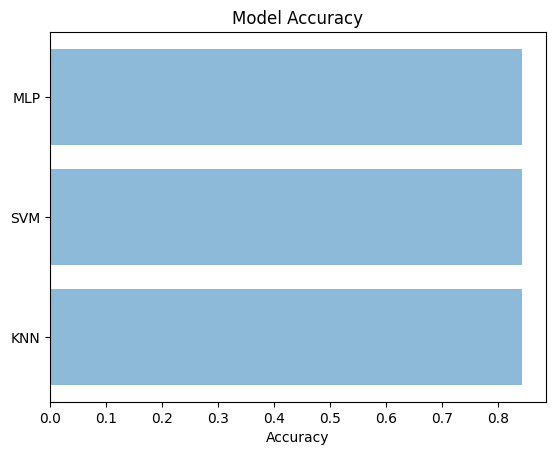

In [125]:
# Label text for each graph
labels = ("KNN", "SVM", "MLP")

# Numbers that you want the bars to represent
value = [count_knn/length_testing, count_svm/length_testing, count_mlp/length_testing]

# Title of the plot
plt.title("Model Accuracy")

# Label for the x values of the bar graph
plt.xlabel("Accuracy")

# Drawing the bar graph
y_pos = np.arange(len(labels))
plt.barh(y_pos, value, align="center", alpha=0.5)
plt.yticks(y_pos, labels)

# Display the graph
plt.show()